Working with Pandas DataFrames
===========================

Pandas is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas. 

For this workshop, we will be using two types of data structues - NumPy arrays and pandas DataFrames. Pandas dataframes are specifically for data which is two dimensional (rows and columns). NumPy arrays, while similar in some ways, are meant to work with higher dimensional data. We'll see this in a future lesson.

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis.

We start by importing pandas and the os library. We use the os library to build our file paths rather than typing them in directly to ensure compatibility of our notebook on different operating systems.

We are going to be looking at a dataset which gives information about the elements in the periodic table. We'll do a little bit of data sorting and cleaning, but we'll be doing a lot more in session 2.

In [1]:
import os

import pandas as pd

In [2]:
file_path = os.path.join("data", "PubChemElements_all.csv")

df = pd.read_csv(file_path)

## Examining Data

Initially when loading data in, and also at certain points as we're working with it, we'll want to see what our dataframe looks like. Youo can see a preview of your dataframe using the `.head` function

In [3]:
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


The `.info` function will give information about the columns and the data type of those columns. The data type will become very important later as we work with data more.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AtomicNumber           118 non-null    int64  
 1   Symbol                 118 non-null    object 
 2   Name                   118 non-null    object 
 3   AtomicMass             118 non-null    float64
 4   CPKHexColor            108 non-null    object 
 5   ElectronConfiguration  118 non-null    object 
 6   Electronegativity      95 non-null     float64
 7   AtomicRadius           113 non-null    float64
 8   IonizationEnergy       102 non-null    float64
 9   ElectronAffinity       57 non-null     float64
 10  OxidationStates        103 non-null    object 
 11  StandardState          118 non-null    object 
 12  MeltingPoint           103 non-null    float64
 13  BoilingPoint           93 non-null     float64
 14  Density                96 non-null     float64
 15  GroupB

For this dataframe, we see that the first column, `AtomicNumber` has the data type of `int64`. Here, `int` means `integer` and `64` means `64 bit`.  The `64 bit` refers to the amount of computer memory the variable can occupy. It won't really be important for us. Similarly, `float64` means `64 bit floating point`. These are decimal numbers.

The other column names which read `object` are not numeric. They might be strings or they might be something else. We'll discuss more later.

The `describe` function can be used on a dataframe to quickly see statistics about columns with numerical data. If you look at the columns that statistics are computed for and compare to the data type shown from `info`, you will see that we only get statistics for columns which had `int64` or `float64` data types.

In [5]:
df.describe()

,AtomicNumber,AtomicMass,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,MeltingPoint,BoilingPoint,Density
count,118.000000,118.000000,95.000000,113.000000,102.000000,57.000000,103.000000,93.000000,96.000000
mean,59.500000,146.607635,1.732316,201.902655,7.997255,1.072140,1273.740553,2536.212473,7.608001
std,34.207699,89.845304,0.635187,42.025707,3.339066,0.879163,888.853859,1588.410919,5.878692
min,1.000000,1.008000,0.700000,120.000000,3.894000,0.079000,0.950000,4.220000,0.000090
25%,30.250000,66.480000,1.290000,180.000000,6.020500,0.470000,516.040000,1180.000000,2.572500
50%,59.500000,142.573850,1.620000,202.000000,6.960000,0.754000,1191.000000,2792.000000,7.072000
75%,88.750000,226.777165,2.170000,229.000000,8.998500,1.350000,1806.500000,3618.000000,10.275250
max,118.000000,294.214000,3.980000,348.000000,24.587000,3.617000,3823.000000,5869.000000,22.570000


## Accessing Data

One great thing about pandas dataframes is how easy it is to access information. Pandas allows you to access information in a dataframe using both data indexes and names.

Pandas dataframes have rows and columns, you can see how many rows and columns using `.shape`. This will return the shape as `(num_rows, num_columns)`.

In [6]:
df.shape

(118, 17)

### Accessing with rows and column numbers

Access on a particular row and column using `.iloc` followed by squarre brackets and the row and column numbers yoou want to access. If you only put one number, it will be assumed to be the row number you want.

The following gets row number 35.

In [7]:
df.iloc[35]

AtomicNumber                           36
Symbol                                 Kr
Name                              Krypton
AtomicMass                           83.8
CPKHexColor                        5CB8D1
ElectronConfiguration    [Ar]4s2 3d10 4p6
Electronegativity                     3.0
AtomicRadius                        202.0
IonizationEnergy                     14.0
ElectronAffinity                      NaN
OxidationStates                         0
StandardState                         Gas
MeltingPoint                       115.79
BoilingPoint                       119.93
Density                          0.003733
GroupBlock                      Noble gas
YearDiscovered                       1898
Name: 35, dtype: object

In [8]:
df.iloc[35, :3]

AtomicNumber         36
Symbol               Kr
Name            Krypton
Name: 35, dtype: object

### Accessing with names

Each dataframe has an index (rows) and columns. The index can be named, but by default it is usually just numbered. 

You can see information about the index or the columns using `df.index` or `df.columns`.

In [9]:
df.index

RangeIndex(start=0, stop=118, step=1)

In [10]:
df.columns

Index(['AtomicNumber', 'Symbol', 'Name', 'AtomicMass', 'CPKHexColor',
       'ElectronConfiguration', 'Electronegativity', 'AtomicRadius',
       'IonizationEnergy', 'ElectronAffinity', 'OxidationStates',
       'StandardState', 'MeltingPoint', 'BoilingPoint', 'Density',
       'GroupBlock', 'YearDiscovered'],
      dtype='object')

To access part of a dataframe using the index or column names, would use the `loc` function.

In [11]:
df.loc[35]

AtomicNumber                           36
Symbol                                 Kr
Name                              Krypton
AtomicMass                           83.8
CPKHexColor                        5CB8D1
ElectronConfiguration    [Ar]4s2 3d10 4p6
Electronegativity                     3.0
AtomicRadius                        202.0
IonizationEnergy                     14.0
ElectronAffinity                      NaN
OxidationStates                         0
StandardState                         Gas
MeltingPoint                       115.79
BoilingPoint                       119.93
Density                          0.003733
GroupBlock                      Noble gas
YearDiscovered                       1898
Name: 35, dtype: object

In [12]:
df.loc[35, 'Electronegativity']

3.0

In [13]:
df.loc[35, ['Name','Electronegativity']] 

Name                 Krypton
Electronegativity        3.0
Name: 35, dtype: object

You can also get a column of information by using `df[column_name]`. 

In [14]:
df['Electronegativity'].head()

0    2.20
1     NaN
2    0.98
3    1.57
4    2.04
Name: Electronegativity, dtype: float64

In [15]:
df[['Name','Electronegativity']]

,Name,Electronegativity
0,Hydrogen,2.20
1,Helium,NaN
2,Lithium,0.98
3,Beryllium,1.57
4,Boron,2.04
...,...,...
113,Flerovium,NaN
114,Moscovium,NaN
115,Livermorium,NaN
116,Tennessine,NaN


## Performing Operations on Columns

Both pandas and NumPy dataframes have the convenient feature that they use something called `broadcasting`. This means that if you are doing something like subtracting a number, multiplying, etc to a column or dataframe of information, it can be done all at once instead of with a `for` loop. Consider if we wanted to calculate the melting point in degrees celsius for all of the elements.

Instead of writing a `for` loop that does this, we can just write the following code. This will return a pandas Series (one dimensional dataframe). 

In [16]:
df['MeltingPoint'] - 273.15

0      -259.34
1      -272.20
2       180.50
3      1286.85
4      2074.85
        ...   
113        NaN
114        NaN
115        NaN
116        NaN
117        NaN
Name: MeltingPoint, Length: 118, dtype: float64

We could do this one two columns as well.

In [17]:
df[['MeltingPoint', 'BoilingPoint']] - 273.15

,MeltingPoint,BoilingPoint
0,-259.34,-252.87
1,-272.20,-268.93
2,180.50,1341.85
3,1286.85,2470.85
4,2074.85,3999.85
...,...,...
113,NaN,NaN
114,NaN,NaN
115,NaN,NaN
116,NaN,NaN


We can capture these in new dataframe columns

In [18]:
df[['MeltingPointC', 'BoilingPointC']] = df[['MeltingPoint', 'BoilingPoint']] - 273.15

In [19]:
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered,MeltingPointC,BoilingPointC
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766,-259.34,-252.87
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868,-272.20,-268.93
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817,180.50,1341.85
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798,1286.85,2470.85
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808,2074.85,3999.85


### The `.apply` operator

In [20]:
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered,MeltingPointC,BoilingPointC
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766,-259.34,-252.87
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868,-272.20,-268.93
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817,180.50,1341.85
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798,1286.85,2470.85
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808,2074.85,3999.85


In [21]:
# Number of letters in name - 
# point - you can use built in functions
df["Name"].apply(len)

0       8
1       6
2       7
3       9
4       5
       ..
113     9
114     9
115    11
116    10
117     9
Name: Name, Length: 118, dtype: int64

In [22]:
# Apply with custom functions

def calculate_num_valence(electron_configuration):
    """Calculate the number of valence electrons based on an electron configuration"""
    
    # Split on spaces
    split_configuration = electron_configuration.split()
    
    electron_sum = 0
    for split in split_configuration:
        last_two = split[-2:]
        
        electrons = ''
        for letter in last_two:
            if letter.isdigit():
                electrons += letter
        if electrons:
            electron_sum += int(electrons)
    
    return electron_sum

In [23]:
calculate_num_valence('[He]2s2 2p2')

4

In [24]:
df["Number of Valence"] = df["ElectronConfiguration"].apply(calculate_num_valence)

In [25]:
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered,MeltingPointC,BoilingPointC,Number of Valence
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766,-259.34,-252.87,1
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868,-272.20,-268.93,2
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817,180.50,1341.85,1
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798,1286.85,2470.85,2
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808,2074.85,3999.85,3


## Built-in plotting

<AxesSubplot:>

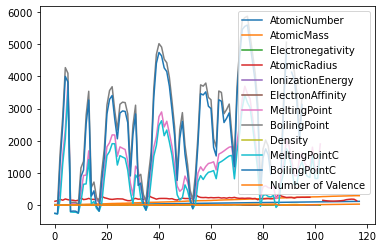

In [26]:
df.plot()

<AxesSubplot:xlabel='Electronegativity', ylabel='AtomicRadius'>

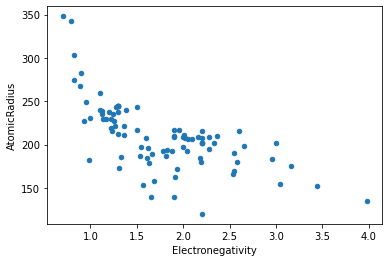

In [27]:
df.plot(x="Electronegativity", y="AtomicRadius", kind="scatter")